In [2]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [3]:
train_labels=[]
train_samples=[]

In [4]:
for i in range(50):
    random_younger=randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)

    random_older=randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    random_younger=randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)

    random_older=randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)

In [5]:
train_labels=np.array(train_labels)
train_samples=np.array(train_samples)
train_labels, train_samples=shuffle(train_labels, train_samples)

In [6]:
scaler=MinMaxScaler(feature_range=(0, 1))
scaled_train_samples=scaler.fit_transform(train_samples.reshape(-1, 1))

In [7]:
scaled_train_samples

array([[0.27586207],
       [0.7816092 ],
       [0.54022989],
       ...,
       [0.14942529],
       [0.17241379],
       [0.36781609]])

# Keras and Tensorflow Imports

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [9]:
physical_devices=tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  0


In [10]:
model=Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
# With out validation
model.fit(
    x=scaled_train_samples,
    y=train_labels,
    batch_size=10,
    epochs=30,
    shuffle=True,
    verbose=2
)

Epoch 1/30
210/210 - 2s - loss: 0.6773 - accuracy: 0.5238 - 2s/epoch - 8ms/step
Epoch 2/30
210/210 - 1s - loss: 0.6446 - accuracy: 0.5776 - 520ms/epoch - 2ms/step
Epoch 3/30
210/210 - 0s - loss: 0.6119 - accuracy: 0.6495 - 485ms/epoch - 2ms/step
Epoch 4/30
210/210 - 1s - loss: 0.5776 - accuracy: 0.7143 - 539ms/epoch - 3ms/step
Epoch 5/30
210/210 - 1s - loss: 0.5448 - accuracy: 0.7624 - 528ms/epoch - 3ms/step
Epoch 6/30
210/210 - 1s - loss: 0.5118 - accuracy: 0.7933 - 680ms/epoch - 3ms/step
Epoch 7/30
210/210 - 0s - loss: 0.4786 - accuracy: 0.8233 - 415ms/epoch - 2ms/step
Epoch 8/30
210/210 - 0s - loss: 0.4475 - accuracy: 0.8486 - 399ms/epoch - 2ms/step
Epoch 9/30
210/210 - 0s - loss: 0.4194 - accuracy: 0.8614 - 402ms/epoch - 2ms/step
Epoch 10/30
210/210 - 0s - loss: 0.3944 - accuracy: 0.8857 - 408ms/epoch - 2ms/step
Epoch 11/30
210/210 - 0s - loss: 0.3726 - accuracy: 0.8914 - 403ms/epoch - 2ms/step
Epoch 12/30
210/210 - 0s - loss: 0.3539 - accuracy: 0.9029 - 410ms/epoch - 2ms/step
Epoc

In [14]:
# With validation
model.fit(
    x=scaled_train_samples,
    y=train_labels,

    # Validation it splits the data into 10% for validation
    validation_split=0.1,
    batch_size=10,
    epochs=30,
    shuffle=True,
    verbose=2
)

Epoch 1/30
189/189 - 1s - loss: 0.2560 - accuracy: 0.9397 - val_loss: 0.2765 - val_accuracy: 0.9476 - 744ms/epoch - 4ms/step
Epoch 2/30
189/189 - 1s - loss: 0.2552 - accuracy: 0.9407 - val_loss: 0.2757 - val_accuracy: 0.9476 - 525ms/epoch - 3ms/step
Epoch 3/30
189/189 - 1s - loss: 0.2544 - accuracy: 0.9333 - val_loss: 0.2743 - val_accuracy: 0.9476 - 574ms/epoch - 3ms/step
Epoch 4/30
189/189 - 0s - loss: 0.2538 - accuracy: 0.9402 - val_loss: 0.2740 - val_accuracy: 0.9476 - 499ms/epoch - 3ms/step
Epoch 5/30
189/189 - 1s - loss: 0.2529 - accuracy: 0.9423 - val_loss: 0.2731 - val_accuracy: 0.9476 - 582ms/epoch - 3ms/step
Epoch 6/30
189/189 - 0s - loss: 0.2522 - accuracy: 0.9418 - val_loss: 0.2721 - val_accuracy: 0.9476 - 499ms/epoch - 3ms/step
Epoch 7/30
189/189 - 0s - loss: 0.2517 - accuracy: 0.9423 - val_loss: 0.2720 - val_accuracy: 0.9476 - 451ms/epoch - 2ms/step
Epoch 8/30
189/189 - 1s - loss: 0.2513 - accuracy: 0.9402 - val_loss: 0.2722 - val_accuracy: 0.9476 - 637ms/epoch - 3ms/step


In [15]:
test_labels=[]
test_samples=[]

In [16]:
for i in range(10):
    random_younger=randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)

    random_older=randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    random_younger=randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)

    random_older=randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)


In [17]:
test_labels=np.array(test_labels)
test_samples=np.array(test_samples)
test_labels, test_samples=shuffle(test_labels, test_samples)

In [18]:
scaled_test_samples=scaler.fit_transform(test_samples.reshape(-1, 1))

## Prediction

In [19]:
predictions=model.predict(
    x=scaled_test_samples,
    batch_size=10,
    verbose=0
)

In [20]:
for i in predictions:
    print(i)

[0.07314963 0.92685044]
[0.96506864 0.03493139]
[0.00889341 0.99110657]
[0.6917165  0.30828345]
[0.01367163 0.9863283 ]
[0.9621599 0.0378401]
[0.9621599 0.0378401]
[0.9635518  0.03644816]
[0.96300715 0.03699282]
[0.96300715 0.03699282]
[0.44479743 0.5552025 ]
[0.05388972 0.94611025]
[0.1592884  0.84071153]
[0.11965208 0.8803479 ]
[0.1592884  0.84071153]
[0.0122806 0.9877194]
[0.9616348  0.03836516]
[0.9619824  0.03801756]
[0.5474156 0.4525844]
[0.05388972 0.94611025]
[0.9516814  0.04831864]
[0.04382059 0.95617944]
[0.01521779 0.98478216]
[0.94474965 0.05525034]
[0.11965208 0.8803479 ]
[0.01367163 0.9863283 ]
[0.07314963 0.92685044]
[0.01102952 0.9889705 ]
[0.13367622 0.86632377]
[0.44479743 0.5552025 ]
[0.08932842 0.91067165]
[0.30161136 0.6983886 ]
[0.91559637 0.08440363]
[0.05970894 0.94029105]
[0.01102952 0.9889705 ]
[0.9516814  0.04831864]
[0.0122806 0.9877194]
[0.64615536 0.35384464]
[0.9656537  0.03434626]
[0.9658039 0.034196 ]
[0.39467847 0.6053215 ]
[0.64615536 0.35384464]
[0.1

In [21]:
rounded_predictions=np.argmax(predictions, axis=-1)

In [22]:
for i in rounded_predictions:
    print(i)

1
0
1
0
1
0
0
0
0
0
1
1
1
1
1
1
0
0
0
1
0
1
1
0
1
1
1
1
1
1
1
1
0
1
1
0
1
0
0
0
1
0
1
0
0
1
0
1
0
1
0
0
0
0
0
0
1
0
0
1
1
1
0
1
0
1
1
1
1
0
1
0
1
1
1
0
1
0
1
1
1
1
1
0
1
0
1
0
0
1
0
0
1
1
0
0
1
0
0
1
0
0
0
0
0
0
1
1
1
1
1
0
1
1
0
0
1
0
1
1
0
1
1
1
1
1
0
1
0
1
1
0
0
1
0
1
0
0
1
1
0
1
1
0
1
1
0
1
1
0
0
0
1
0
0
1
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
0
1
1
0
1
0
1
0
0
1
0
0
0
1
0
0
0
0
1
0
0
1
1
1
1
0
1
1
1
0
1
0
0
1
1
0
1
1
0
0
1
1
1
1
0
1
0
0
1
0
1
1
1
1
0
1
0
1
0
1
1
0
1
1
1
1
1
0
1
0
0
0
0
1
1
0
0
1
0
0
1
0
0
1
1
0
0
0
0
1
1
0
1
1
1
0
1
0
1
0
1
0
0
0
0
1
0
1
1
1
0
1
0
0
0
0
1
1
0
0
0
0
0
0
1
1
0
1
0
1
1
1
0
0
1
1
1
0
0
0
0
1
0
1
0
1
0
0
1
0
1
1
0
0
1
1
1
1
1
0
0
1
1
0
1
0
1
0
1
0
0
0
0
1
0
0
1
1
0
1
1
0
1
1
0
0
1
1
0
0
1
0
1
1
0
1
0
1
1
0
1
1
1
0
0
1
0
1
1
1
0
1
0
0
1
0
0
0
1
1
1
0
0
1
0
0
1
0
0
1
0
0
1
0
1
0
1
0
1
1
1
1
1
1
1
0
1
1
1


# Confusion Matrix

In [23]:
%matplotlib inline
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [24]:
cm=confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [25]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh=cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j]>thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[194  16]
 [ 10 200]]


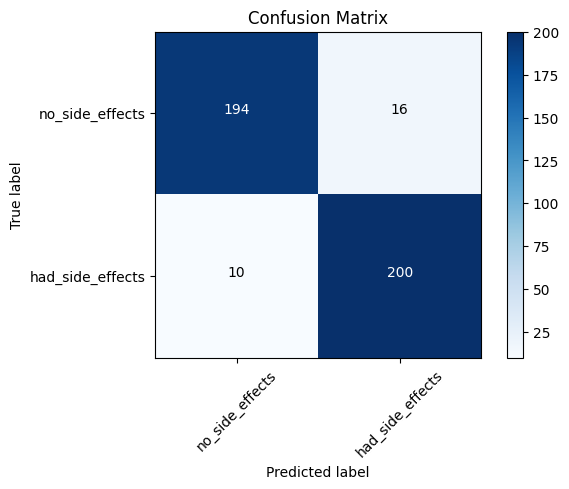

In [26]:
cm_plot_labels=['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Saving Model

### 1 Model.save()

In [27]:
import os.path

if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

#### Using the save model

In [29]:
from tensorflow.keras.models import load_model
new_model=load_model('models/medical_trial_model.h5')

In [31]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [32]:
# We can even get the weights of the model
new_model.get_weights()

[array([[ 4.8092735e-01, -1.2354490e-01,  5.4842156e-01, -1.9491887e-01,
         -7.8823745e-02,  2.7016035e-01,  5.2806127e-01,  6.3737190e-01,
         -3.1264371e-01,  2.4730387e-01, -4.8528150e-01, -1.0081947e-02,
          3.5775453e-04,  5.1977473e-01, -4.0481877e-01,  6.1790609e-01]],
       dtype=float32),
 array([-0.18260303,  0.        , -0.1916672 ,  0.        ,  0.        ,
        -0.12818474, -0.03573742, -0.08870164,  0.        ,  0.19003189,
         0.        ,  0.        , -0.00224555, -0.20708148,  0.        ,
        -0.1973837 ], dtype=float32),
 array([[-0.60977185, -0.5117737 , -0.52420336, -0.04489575, -0.0541679 ,
         -0.2202787 ,  0.22526279, -0.34052664,  0.57968795, -0.33423325,
          0.608276  ,  0.6030976 , -0.19250901,  0.0191153 , -0.02643867,
          0.40490717, -0.11700097,  0.1817517 ,  0.5477669 , -0.4684845 ,
          0.4623694 , -0.52966905,  0.11634707, -0.26123798,  0.11056346,
          0.4771728 ,  0.42830968, -0.30795336, -0.28746

## 2 Model.to_json()

In [36]:
# save asa JSON
json_string = model.to_json()
json_string

# # save as YAML
# yaml_string = model.to_yaml()

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [37]:
# model reconstruction from JSON:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [38]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## 3 Model.save_weights()

In [39]:
import os.path
if os.path.isfile('models/medical_trial_model_weights.h5') is False:
    model.save_weights('models/medical_trial_model_weights.h5')

#### Importing the model using the weights

In [40]:
model2=Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])


In [41]:
model2.load_weights('models/medical_trial_model_weights.h5')

In [42]:
model2.get_weights()

[array([[ 4.8092735e-01, -1.2354490e-01,  5.4842156e-01, -1.9491887e-01,
         -7.8823745e-02,  2.7016035e-01,  5.2806127e-01,  6.3737190e-01,
         -3.1264371e-01,  2.4730387e-01, -4.8528150e-01, -1.0081947e-02,
          3.5775453e-04,  5.1977473e-01, -4.0481877e-01,  6.1790609e-01]],
       dtype=float32),
 array([-0.18260303,  0.        , -0.1916672 ,  0.        ,  0.        ,
        -0.12818474, -0.03573742, -0.08870164,  0.        ,  0.19003189,
         0.        ,  0.        , -0.00224555, -0.20708148,  0.        ,
        -0.1973837 ], dtype=float32),
 array([[-0.60977185, -0.5117737 , -0.52420336, -0.04489575, -0.0541679 ,
         -0.2202787 ,  0.22526279, -0.34052664,  0.57968795, -0.33423325,
          0.608276  ,  0.6030976 , -0.19250901,  0.0191153 , -0.02643867,
          0.40490717, -0.11700097,  0.1817517 ,  0.5477669 , -0.4684845 ,
          0.4623694 , -0.52966905,  0.11634707, -0.26123798,  0.11056346,
          0.4771728 ,  0.42830968, -0.30795336, -0.28746